In [335]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True)
sns.set_theme(style="ticks", color_codes=True)

datapath = 'C:\\Users\\MrBrito\\Documents\\_Grad School\\Rotations\\Satra\\egemaps analysis\\egemaps_vector_both.csv'
egm = pd.read_csv(datapath)#extract all the egemaps data from the csv


In [317]:
def extract_N_scale(dataframe,nFeatures):
    #pull just the numerical data from the number of features in egemaps (88), ignores metadata
    data_unscaled = dataframe.iloc[:,0:nFeatures]
    #scale data: feature data - mean of feature data/variance of feature data
    data = (data_unscaled - data_unscaled.mean())/data_unscaled.var()
    #data = np.divide((data_unscaled - np.mean(data_unscaled, axis=0)),np.std(data_unscaled, axis=0))
    return data

<AxesSubplot:xlabel='PCs', ylabel='%variance'>

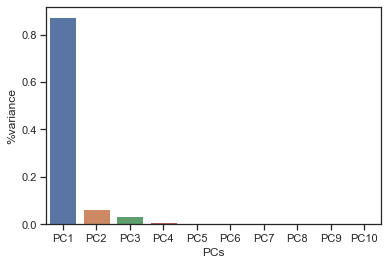

In [318]:
#Split the data based on diagnosis. norm is 'target'= 0, VFP is 'target' = 1
egm_Norm = egm[egm['target']== 0]
egm_VFP = egm[egm['target']== 1]

Norm = extract_N_scale(egm_Norm, 88)
VFP = extract_N_scale(egm_VFP, 88)

pca = PCA(n_components=88)
screeNorm = pd.DataFrame(pca.fit(Norm).explained_variance_ratio_)
screeVFP = pd.DataFrame(pca.fit(VFP).explained_variance_ratio_)
screeNorm['PCs']=['PC' + str(i) for i in np.arange(screeNorm.index.size)+1]
screeNorm.columns= ['%variance', 'PCs']

sns.barplot(x="PCs", y="%variance", data=screeNorm[0:10])

In [348]:
egm

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,sid,token,target,filename
0,38.72469,0.074773,37.18876,38.47970,40.44019,3.251423,37.94022,15.84932,206.4527,360.75950,...,2.325582,0.323750,0.279148,0.086250,0.056111,-36.04536,VFP10,Speech1,1,VFP10_Speech1
1,41.11026,0.121323,37.82011,40.29837,42.86220,5.042088,65.27183,67.44999,107.0295,136.12460,...,1.749271,0.271667,0.260411,0.276667,0.294430,-37.11591,VFP10,Speech2,1,VFP10_Speech2
2,40.64695,0.103110,38.43892,40.61772,43.04973,4.610809,70.18970,41.75834,143.7980,158.40300,...,3.498543,0.175000,0.168201,0.118889,0.079365,-36.20234,VFP10,Speech3,1,VFP10_Speech3
3,30.43643,0.271136,21.39732,35.07611,37.99580,16.598470,520.01150,754.83490,113.2329,72.07719,...,3.197675,0.174545,0.154176,0.116364,0.093738,-40.33198,VFP11,Speech1,1,VFP11_Speech1
4,32.12006,0.241961,22.38828,35.72247,37.69841,15.310130,1028.64100,954.45980,159.6470,112.48600,...,4.081633,0.121429,0.107628,0.120833,0.178814,-39.28465,VFP11,Speech2,1,VFP11_Speech2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,32.00000,0.006370,31.80000,32.00000,32.20000,0.363000,2.65000,1.12000,2.8100,1.38000,...,0.496000,1.960000,1.270000,0.040000,0.000000,-52.40000,VFPNorm8,Vowel2,0,VFPNorm8_Vowel2
907,31.60000,0.006140,31.40000,31.60000,31.80000,0.338000,3.36000,0.84200,3.3000,1.35000,...,0.248000,4.030000,0.000000,0.000000,0.000000,-52.00000,VFPNorm8,Vowel3,0,VFPNorm8_Vowel3
908,28.20000,0.118000,28.90000,29.10000,29.30000,0.418000,31.40000,22.00000,41.8000,0.00000,...,0.248000,4.030000,0.000000,0.000000,0.000000,-43.60000,VFPNorm9,Vowel1,0,VFPNorm9_Vowel1
909,28.30000,0.015700,28.10000,28.30000,28.50000,0.388000,7.03000,5.36000,6.6000,4.35000,...,0.248000,4.030000,0.000000,0.000000,0.000000,-44.20000,VFPNorm9,Vowel2,0,VFPNorm9_Vowel2
